<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C2/C2.html"><img src="../data/C2_nav.png" width="100"  style="float:right;" alt="C1"></a>
<h1>DFT: Phase</h1> 
</div>

<br/>

<p>
Computing a discrete Fourier transform results in complex-valued Fourier coefficients. Each such coefficient can be represented by a magnitude and a phase component. Follow Section 2.3.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss in this notebook the role of the phase component.   
</p> 

## Polar Representation of Fourier Coefficients

Let $x=(x(0), x(1), ..., x(N-1))$ be a signal with samples $x(n)\in\mathbb{R}$ for $n\in[0:N-1]$. The complex Fourier coefficient $c_k:=X(k)\in\mathbb{C}$ for $k\in[0:N-1]$, as computed by the [discrete Fourier transform (DFT)](../C2/C2_DFT-FFT.html), is given by

$$ 
c_k :=X(k) = \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / N). 
$$

Let $c_k = a_k + i b_k$ with real part $a_k\in\mathbb{R}$ and imaginary part $b_k\in\mathbb{R}$. Recall from the [FMP notebook on complex numbers](../C2/C2_ComplexNumbers.html) that the **absolute value** is defined by 

$$|c_k| := \sqrt{a_k^2 + b_k^2}$$

and the **angle** (given in radians) by

$$\gamma_k := \mathrm{angle}(c_k) := \mathrm{atan2}(b_k, a_k) \in [0,2\pi).$$

Using the [exponential function](../C2/C2_ExponentialFunction.html), this yields the **polar coordinate representation**

$$
    c_k = |c_k| \cdot \mathrm{exp}(i \gamma_k).
$$

## Optimality Property

Let $\mathbf{cos}_{k,\varphi}:[0:N-1]\to\mathbb{R}$ be a sampled sinusoid of with frequency parameter $k$ and phase $\varphi\in[0,1)$, defined by

$$
   \mathbf{cos}_{k,\varphi}(n) = \sqrt{2}\mathrm{cos}\big( 2\pi (kn/N - \varphi) \big)
$$

for $n\in[0,N-1]$. Intuitively speaking, when computing the Fourier transform for some discrete signal $x$ of length $N$ and for some frequency parameter $k$, one computes an inner product (a kind of correlation) of the signal $x$ and the sinusoid $\mathbf{cos}_{k,\varphi_k}$. The phase $\varphi_k$ has the remarkable property that it maximizes the correlation between $x$ and all possible sinusoids $\mathbf{cos}_{k,\varphi}$ with $\varphi\in[0,1)$. In other words:

$$
     \varphi_k  = \mathrm{argmax}_{\varphi\in[0,1)} \langle x | \mathbf{cos}_{k,\varphi} \rangle. 
$$

The complex Fourier coefficient $X(k)$ encodes this optimal phase, which is basically given by the angle of the complex number. More precisely, let $\gamma_k$ be the angle of $X(k)$, then one can show that the optimal phase $\varphi_k$ is given by

$$
      \varphi_k := - \frac{\gamma_k}{2 \pi}.
$$

In the following code cell, we demonstrate this optimality property.

Sinusoid with phase from Fourier coefficient resulting in an optimal correlation.


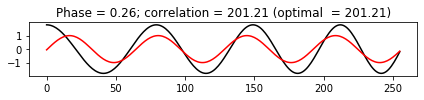

Sinusoid with an arbitrary phase resulting in a medium correlation.


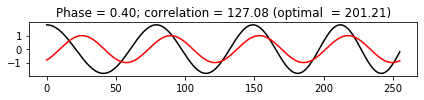

Sinusoid with a phase that yields a correlation close to zero.


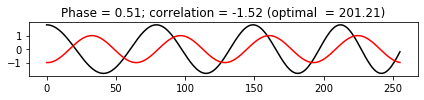

In [1]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

sys.path.append('..')
import libfmp.b
import libfmp.c2
import libfmp.c6

%matplotlib inline

# Generate a chirp-like test signal (details not important)
N = 256
t_index = np.arange(N)
x = 1.8 * np.cos(2 * np.pi * (3 * (t_index * (1 + t_index / (4 * N))) / N))

k = 4
exponential = np.exp(-2 * np.pi * 1j * k * t_index / N)
X_k = np.sum(x * exponential)
phase_k = - np.angle(X_k) / (2 * np.pi)

def compute_plot_correlation(x, N, k, phase):
    sinusoid = np.cos(2 * np.pi * (k * t_index / N - phase)) 
    d_k = np.sum(x * sinusoid)
    plt.figure(figsize=(6,1.5))
    plt.plot(t_index, x, 'k')
    plt.plot(sinusoid, 'r')
    plt.title('Phase = %0.2f; correlation = %0.2f (optimal  = %0.2f)' % (phase, d_k, np.abs(X_k)))
    plt.tight_layout()
    plt.show()

print('Sinusoid with phase from Fourier coefficient resulting in an optimal correlation.')    
compute_plot_correlation(x, N, k, phase=phase_k)

print('Sinusoid with an arbitrary phase resulting in a medium correlation.')  
compute_plot_correlation(x, N, k, phase=0.4)

print('Sinusoid with a phase that yields a correlation close to zero.')  
compute_plot_correlation(x, N, k, phase=0.51)

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>